In [8]:
import pandas as pd
from common.outliers import *
from common.clustering import *
from common.standardization import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 10]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [9]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2             2006   
10448                                    Deus Ex       PC             2000   
10449                  Monster Rancher Advance 2      GBA             2002   
10450                              Karnaaj Rally      GBA             2003   
10451                Wade Hixton's Counter Punch      GBA             2004   

              Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales

### Data stats for each column

In [10]:
columns_to_get_stats_from = ["Global_Sales", "User_Score", "Critic_Score",
                             "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_to_get_stats_from})
print(columns_stats.to_string())

        Global_Sales    User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales  Year_of_Release
max        82.530000  9.600000e+00     99.000000  28.960000  41.360000  10.220000      2016.000000
min         0.010000  8.881784e-16     13.000000   0.000000   0.000000   0.000000      1977.000000
std         1.904295  1.302502e+00     12.449681   0.622661   1.002670   0.385861         6.070377
mean        0.810365  7.270068e+00     70.942011   0.225307   0.402908   0.108312      2006.003636
median      0.360000  7.500000e+00     72.400000   0.070000   0.170000   0.000000      2007.000000


### Data standardization

In [11]:
columns_to_standardize = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales",
                          "NA_Sales", "JP_Sales", "Year_of_Release"]
standardize(data, columns_to_standardize, columns_stats)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii        -0.000599   
1                              Super Mario Bros.      NES        -3.460022   
2                                 Mario Kart Wii      Wii         0.328870   
3                              Wii Sports Resort      Wii         0.493604   
4                       Pokemon Red/Pokemon Blue       GB        -1.647943   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2        -0.000599   
10448                                    Deus Ex       PC        -0.989005   
10449                  Monster Rancher Advance 2      GBA        -0.659537   
10450                              Karnaaj Rally      GBA        -0.494802   
10451                Wade Hixton's Counter Punch      GBA        -0.330068   

              Genre   NA_Sales   EU_Sales   JP_Sales  Global_Sa

### Outliers - 1D

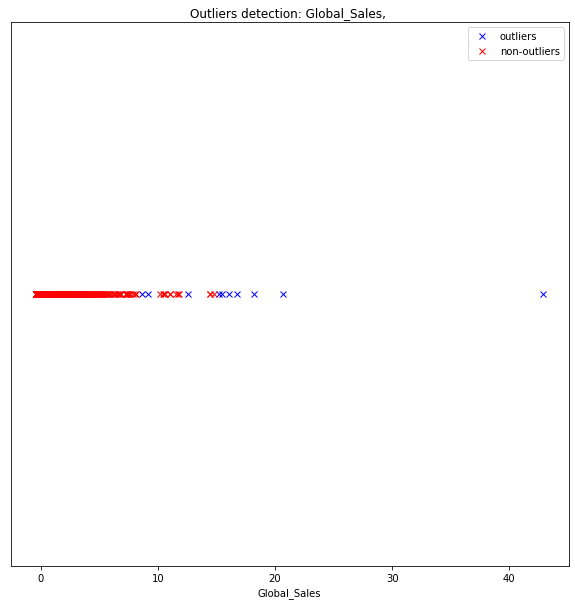

Outliers according to column Global_Sales
Wii Sports: 42.91332813369049
Super Mario Bros.: 20.705634016604392
Mario Kart Wii: 18.22702639701001
Wii Sports Resort: 16.782922381356506
Nintendogs: 12.529379644340723
Pokemon Red/Pokemon Blue: 16.047742155205633
Tetris: 15.46484926161458
Pokemon Diamond/Pokemon Pearl: 9.158053178705993
Super Mario Bros. 3: 8.648678307730028
New Super Mario Bros.: 15.22329004445072

Outliers according to column User_Score
My Little Pony: Pinkie Pie's Party: -5.581615813115203
Pool Party: -5.044188775703075
Happy Feet: -5.351289939938577
Power Gig: Rise of the SixString: -5.197739357820827
Charlie and the Chocolate Factory: -5.197739357820827
Thrillville: Off the Rails: -5.1209640667619505
Deal or No Deal: -4.122885282996569
FIFA Soccer 13: -4.353211156173195
Harvest Moon: Friends of Mineral Town: 1.7888121285368477
NHL 15: -4.353211156173195

Outliers according to column Critic_Score
Ride to Hell: -4.65409597605078
Leisure Suit Larry: Box Office Bust: -4.332

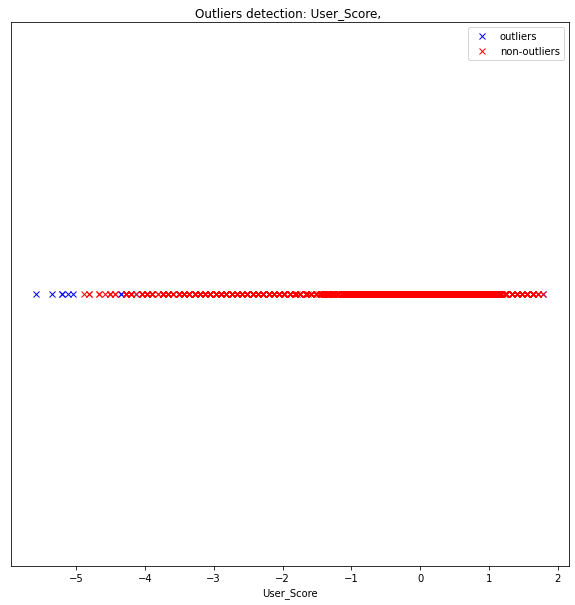

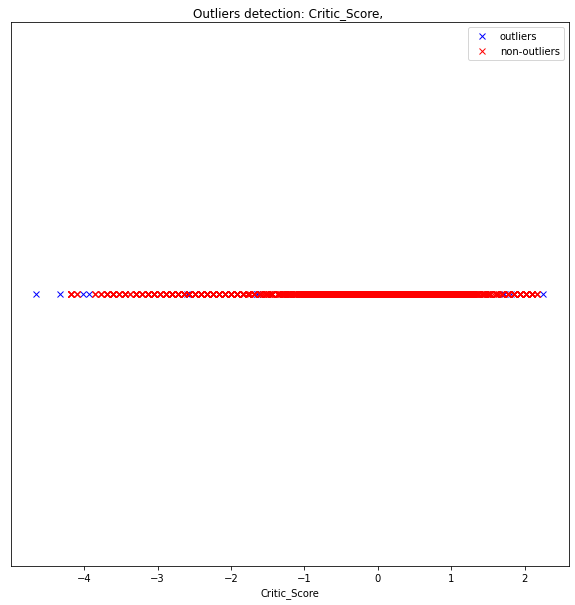

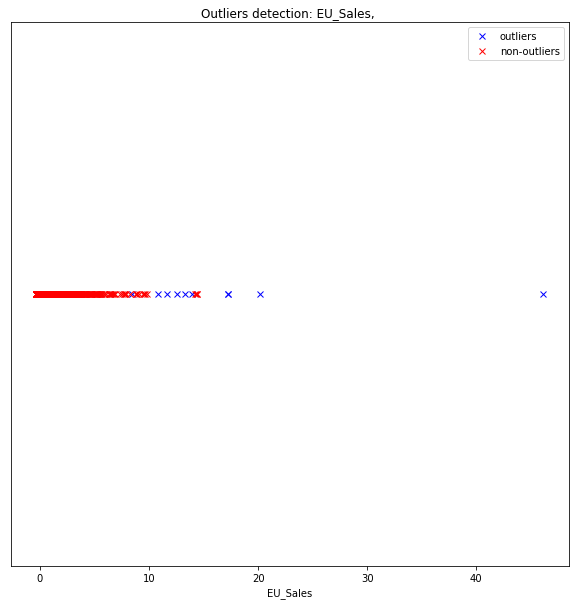

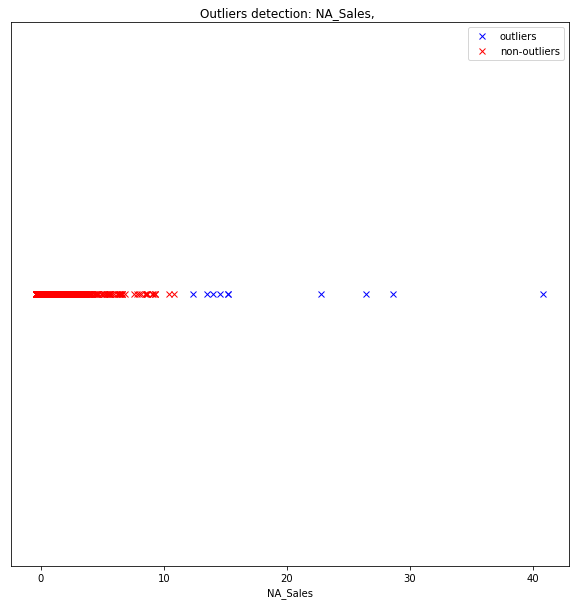

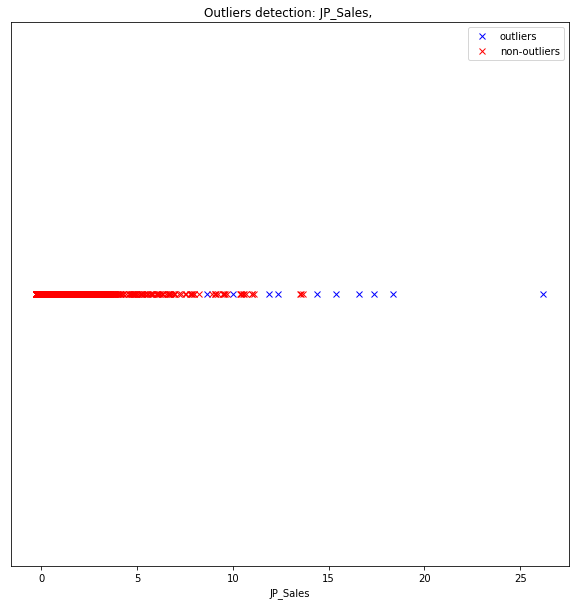

In [12]:
r_percentage = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
k_neighbours = [2, 2, 2, 2, 2, 2]
nearest_neighbours_columns = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
outliers_for_each_column = []
for index, column in enumerate(nearest_neighbours_columns):
    outliers, non_outliers = find_outliers_in_single_column(data, column, k_neighbours[index], r_percentage[index])
    outliers_for_each_column.append(outliers)
    plot_1d_data_with_outliers(outliers, non_outliers, column)
    pretty_print_1d_outliers(outliers, column)

### Outliers - 2D

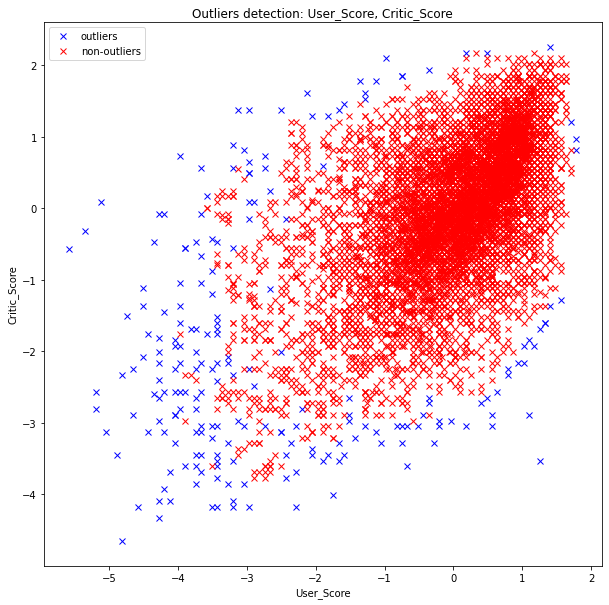

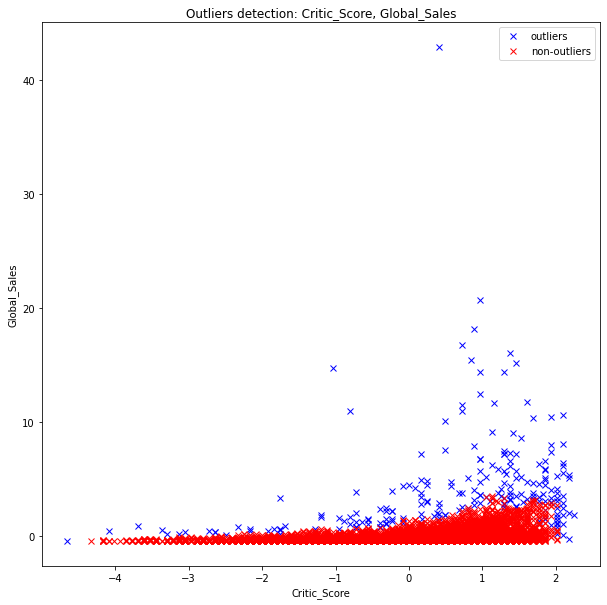

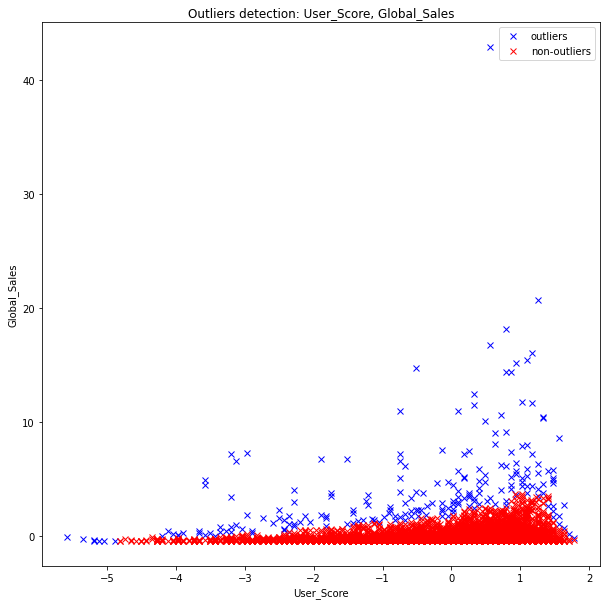

In [13]:
k_neighbours = 5
r_percentage = 0.02
nearest_neighbours_columns = [["User_Score", "Critic_Score"],
                              ["Critic_Score", "Global_Sales"],
                              ["User_Score", "Global_Sales"]]
outliers_for_each_pair = []
for column_pair in nearest_neighbours_columns:
    outliers, non_outliers = find_outliers_in_multiple_columns(data, column_pair, k_neighbours, r_percentage)
    outliers_for_each_pair.append(outliers)
    plot_2d_data_with_outliers(outliers, non_outliers, column_pair)

### Clustering 2D (K-means)

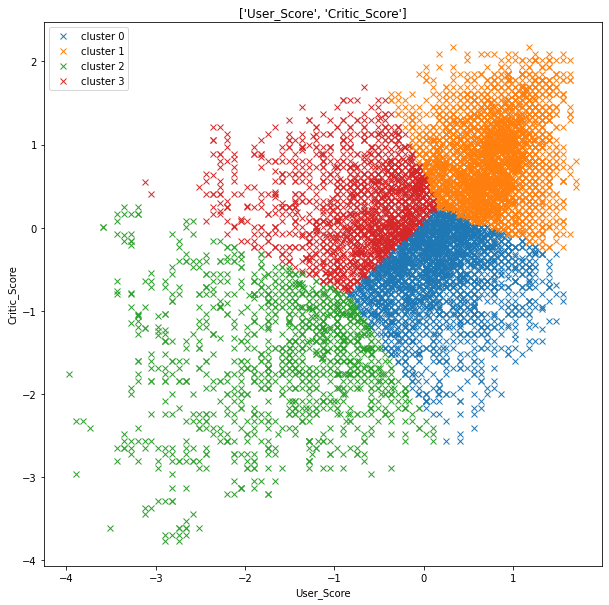

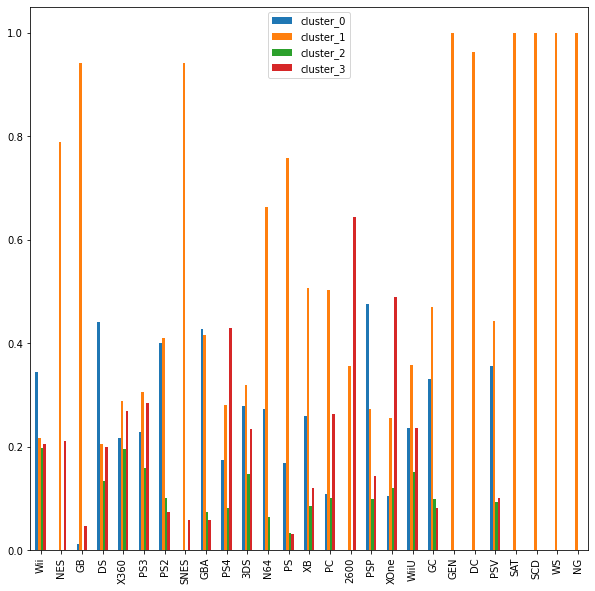

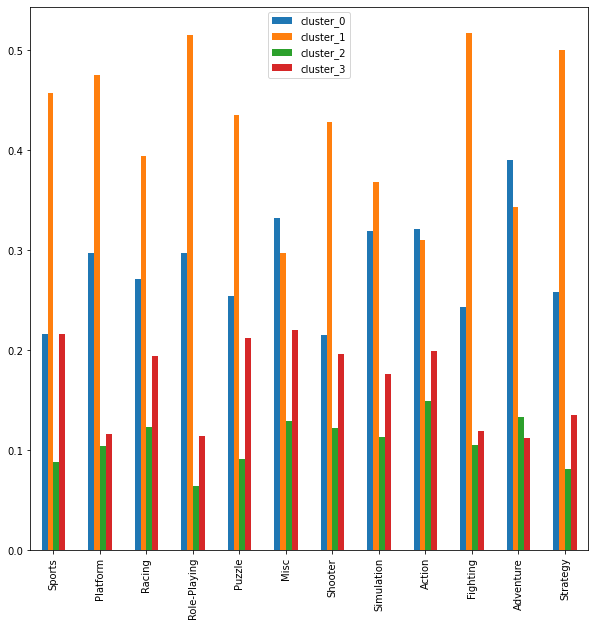

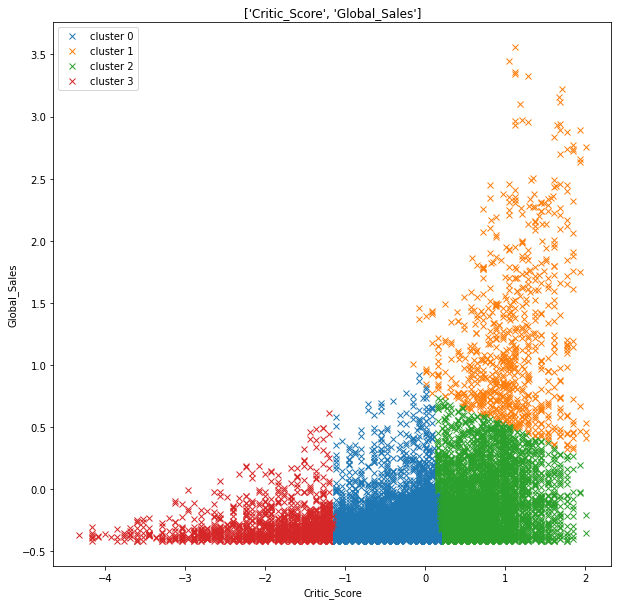

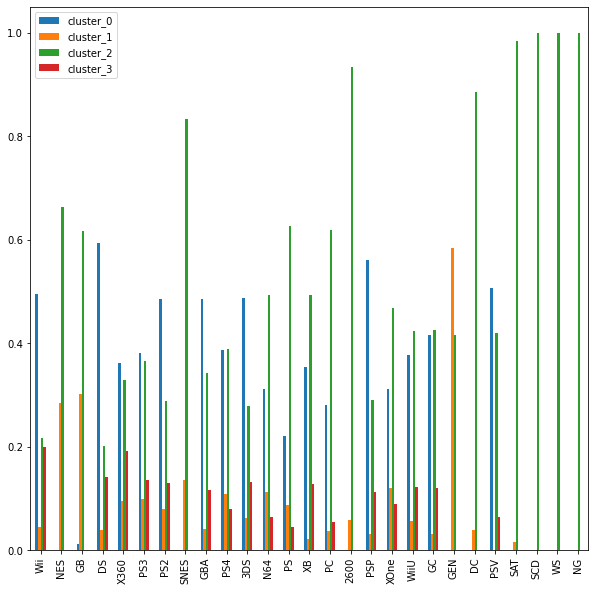

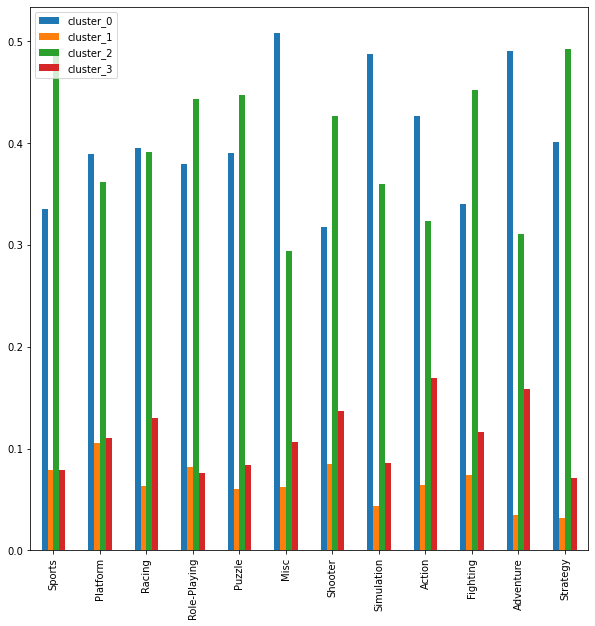

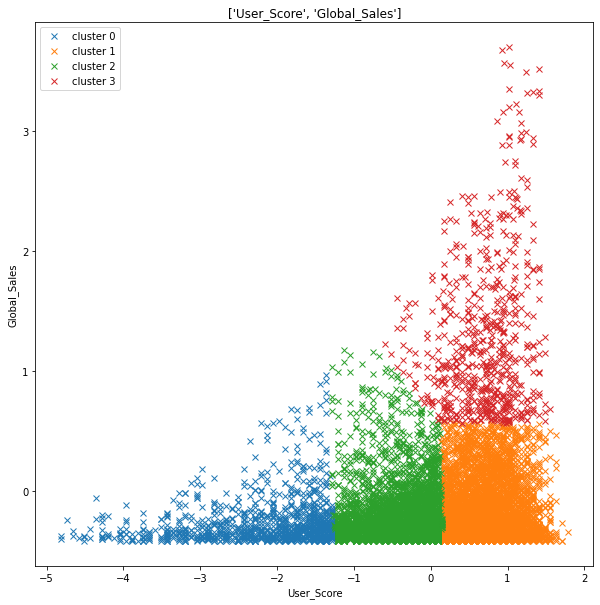

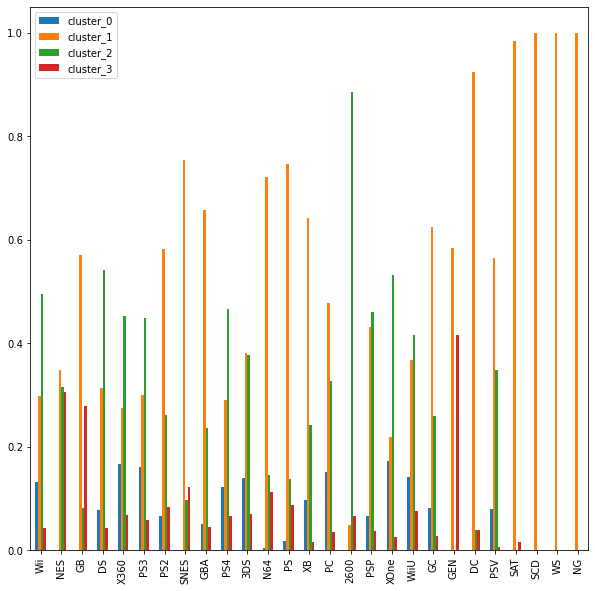

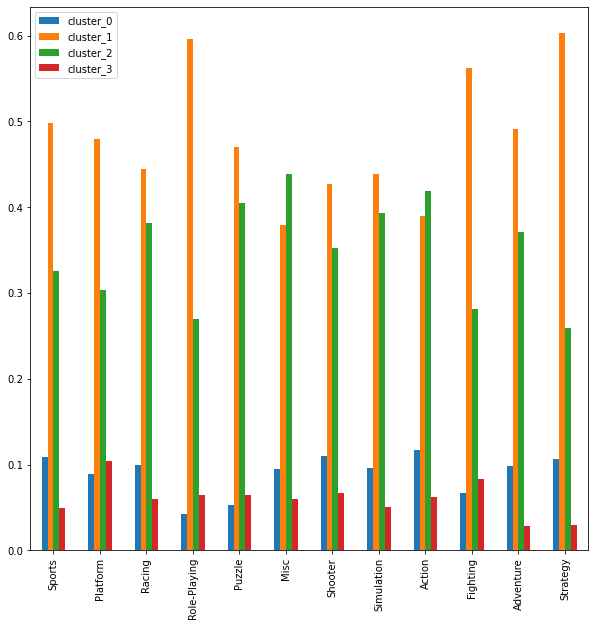

In [14]:
columns_to_analyze = ["Platform", "Genre"]
numbers_of_clusters = [4, 4, 4, 4, 4]
k_means_columns = [["User_Score", "Critic_Score"],
                   ["Critic_Score", "Global_Sales"],
                   ["User_Score", "Global_Sales"]]

for index, column_pair in enumerate(k_means_columns):
    data_without_outliers = drop_outliers_from_dataset(data, outliers_for_each_pair[index])
    clustered_data = k_means_multiple_dim_clustering(data_without_outliers, column_pair, numbers_of_clusters[index])
    plot_2d_data_with_clusters(clustered_data, column_pair)

    for column_to_analyze in columns_to_analyze:
        unique_values = data[column_to_analyze].unique()
        temp_data = pd.DataFrame(index=unique_values)
        for i in range(numbers_of_clusters[index]):
            cluster = clustered_data[clustered_data["cluster"] == i]
            number_of_entries_by_analyzed = cluster.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
            total_number_of_entries_by_analyzed = data.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
            temp_data["cluster_{}".format(i)] = number_of_entries_by_analyzed / total_number_of_entries_by_analyzed
        temp_data.plot.bar()